In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
plt.rcParams.update({'figure.max_open_warning': 0})

In [4]:
df = pd.read_csv('games.csv')

In [5]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
created_at,20058.0,1.483617e+12,2.850151e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504493e+12
last_move_at,20058.0,1.483618e+12,2.850140e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504494e+12
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


In [7]:
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [8]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [9]:
def mis_val(data):
    mis_num = data.isnull().sum() 
    mis_num_percent = 100 * data.isnull().sum() /len(data)
    mis_val = pd.concat([mis_num, mis_num_percent], axis = 1)
    mis_val_ren_columns = mis_val.rename(
    columns = {0 : 'Missing values', 1 : '% of Total'})
    mis_val_ren_columns = mis_val_ren_columns[
        mis_val_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total', ascending = False).round(1)
    return mis_val_ren_columns


In [10]:
mis_val(df).sum()


Missing values    0.0
% of Total        0.0
dtype: float64

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [13]:
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [14]:
df.duplicated().sum()

429

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19629 non-null  object 
 1   rated           19629 non-null  bool   
 2   created_at      19629 non-null  float64
 3   last_move_at    19629 non-null  float64
 4   turns           19629 non-null  int64  
 5   victory_status  19629 non-null  object 
 6   winner          19629 non-null  object 
 7   increment_code  19629 non-null  object 
 8   white_id        19629 non-null  object 
 9   white_rating    19629 non-null  int64  
 10  black_id        19629 non-null  object 
 11  black_rating    19629 non-null  int64  
 12  moves           19629 non-null  object 
 13  opening_eco     19629 non-null  object 
 14  opening_name    19629 non-null  object 
 15  opening_ply     19629 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.4+ MB


In [18]:
int_types = ['uint8', 'int8', 'int16']
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



Text(0, 0.5, 'Количество партий')

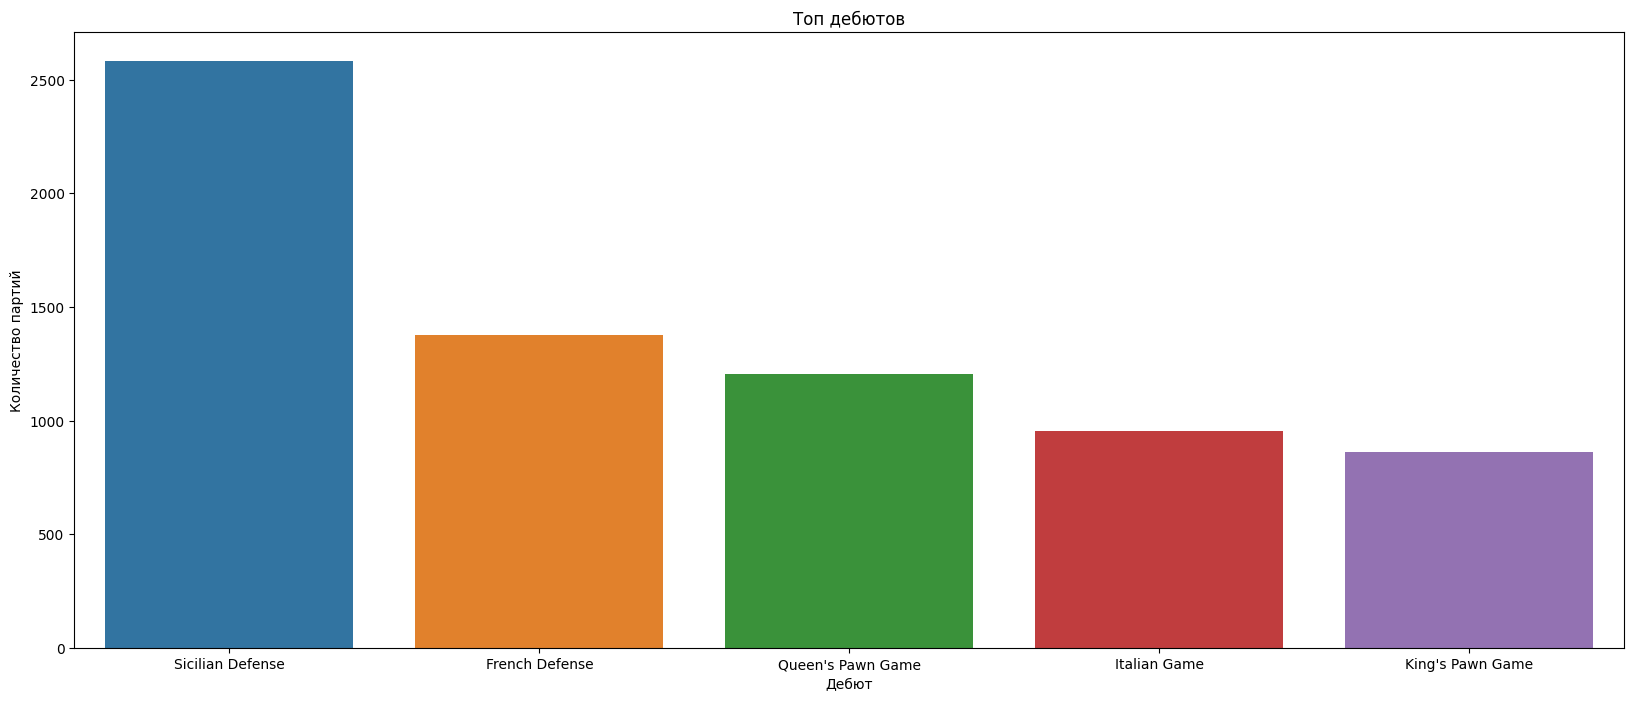

In [34]:
top_openings = df.pivot_table(index = 'opening_name', 
                             values = 'id', 
                             aggfunc = 'count').sort_values(by = ['id', 'opening_name'], ascending = [ False , True ]).head(5)
plt.figure(figsize=(20,8))
sns.barplot(x = top_openings.index, y = top_openings['id'])
plt.title('Топ дебютов')
plt.xlabel('Дебют')
plt.ylabel('Количество партий')

Text(0, 0.5, 'Ходов в партии')

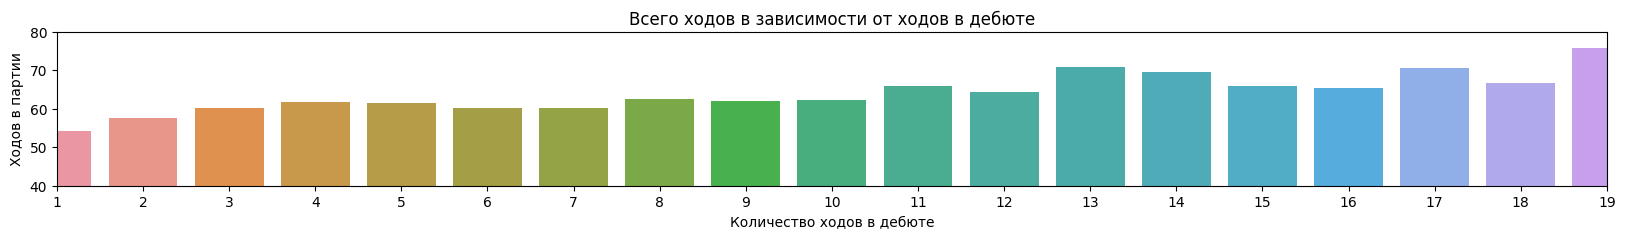

In [35]:
mean_turns = df.pivot_table(index = 'opening_ply', 
                             values = 'turns', 
                             aggfunc = 'mean').sort_values(by = 'turns')
plt.figure(figsize=(20,2))
sns.barplot(x = mean_turns.index, y = mean_turns['turns'])
plt.ylim(40,80)
plt.xlim(0,18)
plt.title('Всего ходов в зависимости от ходов в дебюте')
plt.xlabel('Количество ходов в дебюте')
plt.ylabel('Ходов в партии')

In [ ]:
df.info()

C:\Users\user\AppData\Local\Temp\ipykernel_1920\3801911469.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

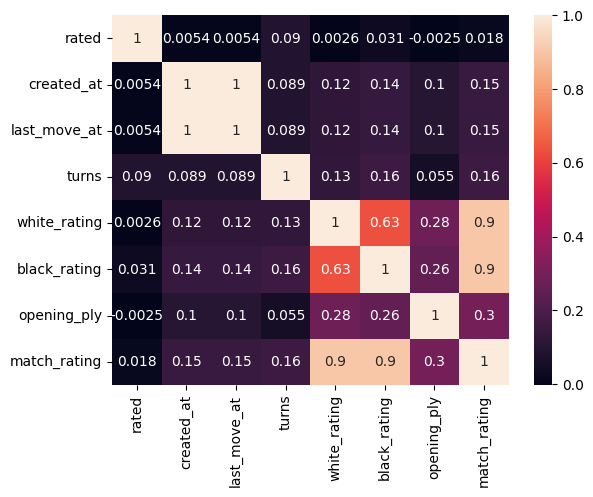

In [39]:
sns.heatmap(df.corr(), annot = True)
